In [10]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

import plotly.graph_objects as go

tqdm.pandas()

In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [16]:
card = []
newcard = []
new = []

df = pd.read_csv('output/card.csv')
df.progress_apply(lambda x: card.append([x['text'], x['intent'], model.encode(x['text'])]), axis=1)
df = pd.read_csv('output/new card.csv')
df.progress_apply(lambda x: newcard.append([x['text'], x['intent'], model.encode(x['text'])]), axis=1)
df = pd.read_csv('output/new.csv')
df.progress_apply(lambda x: new.append([x['text'], x['intent'], model.encode(x['text'])]), axis=1)

with open('embeddings.npy', 'wb') as f:
    np.save(f, np.array(card))
    np.save(f, np.array(newcard))
    np.save(f, np.array(new))

100%|██████████| 282/282 [00:03<00:00, 73.73it/s]
/var/folders/h7/l8b3z2xs3cl9453ftj_b_5c80000gp/T/ipykernel_12491/907630333.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(card))
/var/folders/h7/l8b3z2xs3cl9453ftj_b_5c80000gp/T/ipykernel_12491/907630333.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(newcard))
/var/folders/h7/l8b3z2xs3cl9453ftj_b_5c80000gp/T/ipykernel_12491/907630333.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-

In [4]:
with open('embeddings.npy', 'rb') as f:
    card = np.load(f, allow_pickle=True)
    newcard = np.load(f, allow_pickle=True)
    new = np.load(f, allow_pickle=True)

In [36]:
intent1 = 'activate_my_card'
intent2 = 'atm_support'

intent1pca = []
for obj in card:
    if obj[1] == intent1:
        intent1pca.append(PCA(random_state=0).fit_transform(card[:,2]))
two_dim = PCA(random_state=0).fit_transform(card[:,2])
two_dim.shape

IndentationError: expected an indented block (3427980120.py, line 6)

In [45]:
PCA(random_state=0).fit_transform(card[card[:,1] == 'activate_my_card'][:,2])

ValueError: setting an array element with a sequence.

In [5]:
df1 = pd.read_csv('output/card.csv')
df1 = df1[df1['intent'] == 'activate_my_card']
emb1 = []
for i in range(len(df1)):
    emb1.append(model.encode(df1.iloc[i]['text']))
len(emb1)

159

In [6]:
df2 = pd.read_csv('output/card.csv')
df2 = df2[df2['intent'] == 'atm_support']
emb2 = []
for i in range(len(df2)):
    emb2.append(model.encode(df2.iloc[i]['text']))
len(emb2)

87

In [7]:
pca = PCA(random_state=0, n_components=2)
pca.fit(emb1 + emb2)
two1 = pca.transform(emb1)
two2 = pca.transform(emb2)

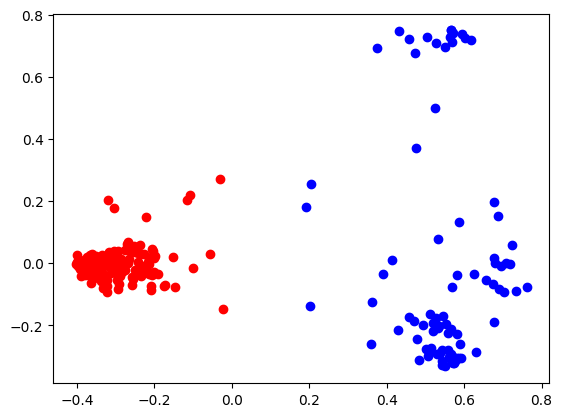

In [8]:
plt.Figure((10,10))
plt.scatter(two1[:,0], two1[:,1], color='red')
plt.scatter(two2[:,0], two2[:,1], color='blue')

In [12]:
x = list(two1[:,0]) + list(two2[:,0])
y = list(two1[:,1]) + list(two2[:,1])
text = [df1.iloc[_]['text'] for _ in range(len(two1))] + [df2.iloc[_]['text'] for _ in range(len(two2))]
textcolor = [0 for _ in range(len(two1))] + [1 for _ in range(len(two2))]

In [13]:
fig = go.Figure(data=go.Scatter(x=x,
                                y=y,
                                mode='markers',
                                marker=dict(
                                    size=8,
                                    color=textcolor, #set color equal to a variable
                                    colorscale='rainbow', # one of plotly colorscales
                                    showscale=True
                                ),
                                text=text)) # hover text goes here

fig.update_layout(title='Population of USA States')
fig.show()